In [1]:
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

sns.set()

In [2]:
#df = pd.read_csv(r"C:\Users\alexchen\ML\nzairfare\NZairfares.csv")

In [3]:
#Reduce data size
df = pd.read_csv(r"C:\Users\alexchen\ML\nzairfare\NZairfares.csv")
df = df.sample(frac=0.04) # Get 30% of the data
len(df)                  # check length

6513

In [10]:
df=df.rename(columns={'Travel Date':'Date_of_Journey','Dep. time':'Dep_Time','Arr. time':'Arrival_Time','Dep. airport':'Source','Arr. airport':'Destination','Direct':'Total_Stops','Airfare(NZ$)':'Price'})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6513 entries, 78098 to 42923
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_of_Journey  6513 non-null   object
 1   Source           6513 non-null   object
 2   Dep_Time         6513 non-null   object
 3   Destination      6513 non-null   object
 4   Arrival_Time     6513 non-null   object
 5   Duration         6513 non-null   object
 6   Total_Stops      6513 non-null   object
 7   Transit          4984 non-null   object
 8   Baggage          95 non-null     object
 9   Airline          6513 non-null   object
 10  Price            6513 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 610.6+ KB


In [12]:
df.shape

(6513, 11)

In [13]:
##check missing values
df.isnull().sum()

Date_of_Journey       0
Source                0
Dep_Time              0
Destination           0
Arrival_Time          0
Duration              0
Total_Stops           0
Transit            1529
Baggage            6418
Airline               0
Price                 0
dtype: int64

In [14]:
df.head()

,Date_of_Journey,Source,Dep_Time,Destination,Arrival_Time,Duration,Total_Stops,Transit,Baggage,Airline,Price
78098,28/10/2019,ZQN,11:40 AM,DUD,2:55 PM,3h 15m,(1 stop),1h 10m in CHC,NaN,Air New Zealand,373
130856,24/11/2019,ZQN,12:45 PM,PMR,9:40 PM,8h 55m,(1 stop),5h 50m in AKL,NaN,Air New Zealand,590
106917,12/11/2019,WLG,1:45 PM,NPE,8:20 PM,6h 35m,(1 stop),4h 25m in AKL,NaN,Air New Zealand,354
67345,23/10/2019,CHC,3:00 PM,ZQN,7:15 PM,4h 15m,(1 stop),1h in AKL,NaN,Air New Zealand,332
123976,20/11/2019,ZQN,4:10 PM,CHC,5:20 PM,1h 10m,(Direct),NaN,NaN,Air New Zealand,296


In [15]:
df.describe()

,Price
count,6513.000000
mean,407.988945
std,168.978106
min,41.000000
25%,293.000000
50%,392.000000
75%,502.000000
max,1343.000000


In [16]:
df.columns

Index(['Date_of_Journey', 'Source', 'Dep_Time', 'Destination', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Transit', 'Baggage', 'Airline', 'Price'],
      dtype='object')

In [19]:
#Check category var value distinct count
#print(df['Travel Date'].unique())
#print(df['Dep. airport'].unique())
#print(df['Arr. airport'].unique())
#print(df['Arr. time'].unique())
#print(df['Duration'].unique())
print(df['Total_Stops'].unique())
#print(df['Transit'].unique())
#print(df['Baggage'].unique())
#print(df['Airline'].unique())


['(1 stop)' '(Direct)' '(2 stops)']


In [18]:
#Check category var value count
#print(df['Travel Date'].value_counts())
#print(df['Dep. airport'].value_counts())
#print(df['Arr. airport'].value_counts())
#print(df['Arr. time'].value_counts())
#print(df['Duration'].value_counts())
#print(df['Direct'].value_counts())
#print(df['Transit'].value_counts())
#print(df['Baggage'].value_counts())
#print(df['Airline'].value_counts())


In [20]:
# Remove column Baggage
df=df.drop(columns=['Baggage'])
# Drop missing value

df = df[df['Source'].notna()]
df = df[df['Arrival_Time'].notna()]
# Drop transit missing value when Direct not equal to "direct" 
# If Direct equal to "direct" then nah in transit will be count as 0
df_1 = df[df['Total_Stops'].isin(["(1 stop)","(2 stops)","(3 stops)"])&(df['Transit'].notnull())]
df_2 = df[df['Total_Stops']=="(Direct)"].fillna(0)
df_3 = pd.concat([df_1,df_2])

In [21]:
##check missing values
df_3.isnull().sum()

#df.head()

Date_of_Journey    0
Source             0
Dep_Time           0
Destination        0
Arrival_Time       0
Duration           0
Total_Stops        0
Transit            0
Airline            0
Price              0
dtype: int64

In [22]:
df_3.shape

(5747, 10)

### Split Data

In [23]:
################### split to train_data and test_data ##############################
train_data, test_data = train_test_split(df_3, test_size=0.2, random_state=25)

### Train Data

In [25]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day
train_data["Journey_day"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [26]:
train_data=train_data.drop(columns=['Transit'])


In [20]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_time"], axis = 1, inplace = True)

In [21]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data["Arr. time"]).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data["Arr. time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arr. time"], axis = 1, inplace = True)

In [22]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [24]:
train_data.drop(["Duration"], axis = 1, inplace = True)

In [25]:
train_data["Direct"].value_counts()

(1 stop)    3891
(Direct)     709
Name: Direct, dtype: int64

In [26]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

In [27]:
train_data.head()

,Travel_date,Departure,Destination,Direct,Airline,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
117365,17/11/2019,ZQN,NPE,1,Air New Zealand,590,17,11,16,55,9,25,16,30
92539,5/11/2019,CHC,NPL,1,Air New Zealand,401,5,11,5,45,8,55,3,10
41404,9/10/2019,CHC,NPL,1,Air New Zealand,401,9,10,11,0,14,45,3,45
72268,26/10/2019,AKL,NPL,1,Air New Zealand,722,26,10,7,0,11,20,4,20
124082,20/11/2019,ZQN,DUD,1,Air New Zealand,502,20,11,12,0,21,35,9,35


In [28]:
train_data['Departure'].value_counts()

WLG    1353
CHC    1286
AKL    1229
ZQN     732
Name: Departure, dtype: int64

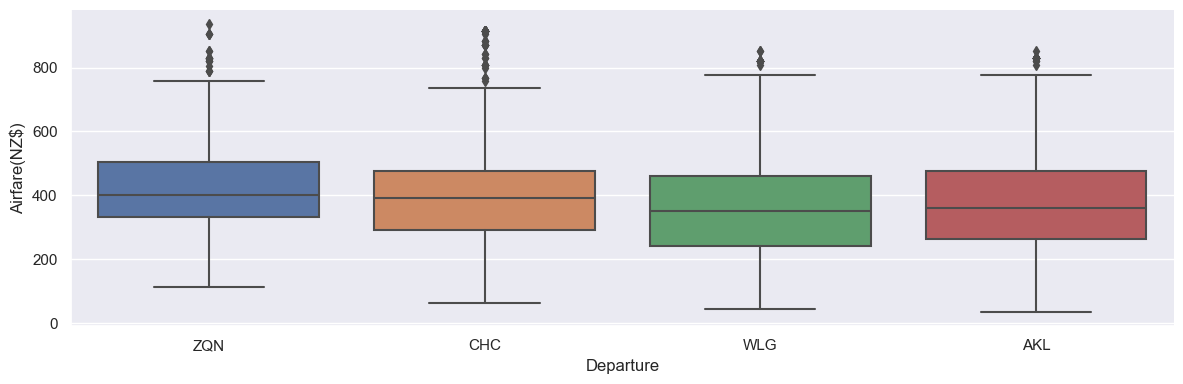

In [29]:
# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Departure", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

In [30]:
# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = train_data["Departure"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Dept_')

#Departure = pd.get_dummies(Departure)

Departure.head()

,Dept_AKL,Dept_CHC,Dept_WLG
117365,0,0,0
92539,0,1,0
41404,0,1,0
72268,1,0,0
124082,0,0,0


In [31]:
train_data['Destination'].value_counts()

NSN    629
NPE    600
DUD    538
AKL    531
PMR    520
CHC    503
NPL    480
ZQN    404
WLG    395
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = train_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Arr_')

#Destination = pd.get_dummies(Destination)

Destination.head()

,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
117365,0,0,0,1,0,0,0,0
92539,0,0,0,0,1,0,0,0
41404,0,0,0,0,1,0,0,0
72268,0,0,0,0,1,0,0,0
124082,0,0,1,0,0,0,0,0


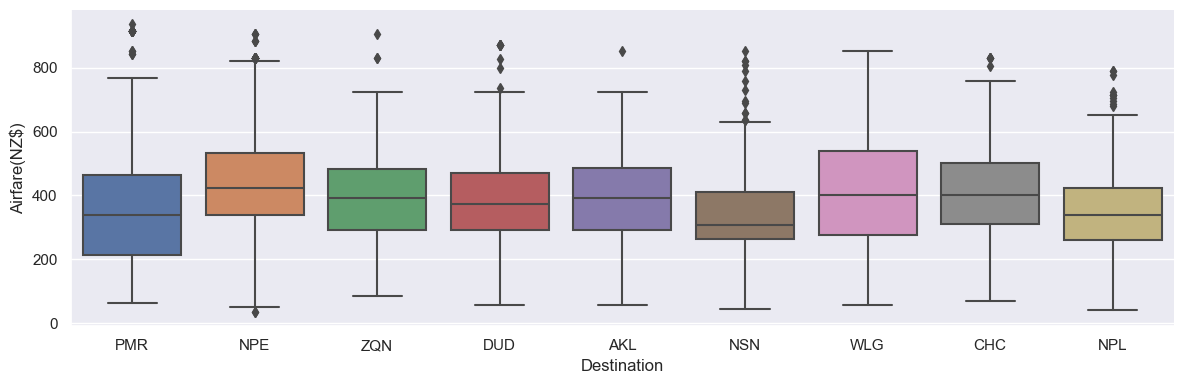

In [33]:
# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Destination", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

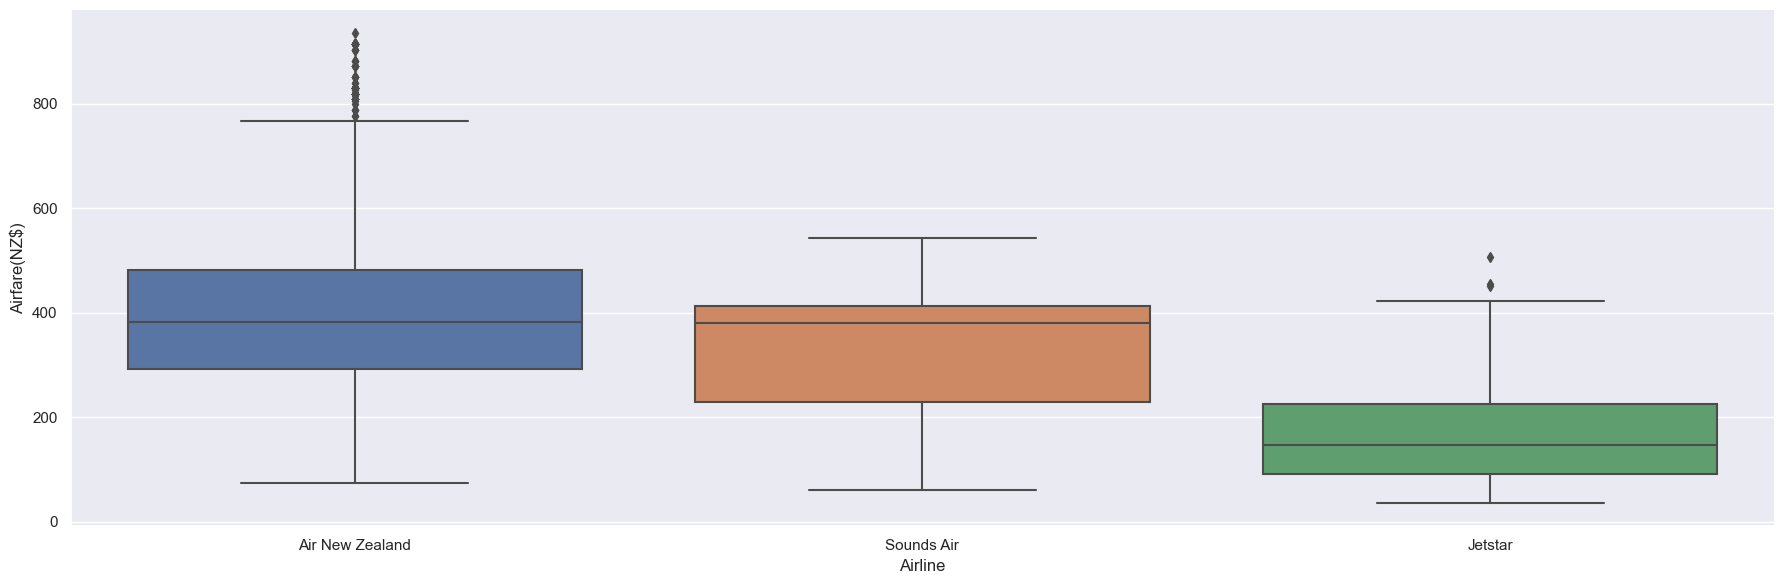

In [34]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Airfare(NZ$)", x = "Airline", data = train_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

In [35]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=train_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

Airline.head()

,Air New Zealand,Jetstar
117365,1,0
92539,1,0
41404,1,0
72268,1,0
124082,1,0


In [36]:
#train_data["Transit"].value_counts()

In [37]:
train_data.head()

,Travel_date,Departure,Destination,Direct,Airline,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
117365,17/11/2019,ZQN,NPE,1,Air New Zealand,590,17,11,16,55,9,25,16,30
92539,5/11/2019,CHC,NPL,1,Air New Zealand,401,5,11,5,45,8,55,3,10
41404,9/10/2019,CHC,NPL,1,Air New Zealand,401,9,10,11,0,14,45,3,45
72268,26/10/2019,AKL,NPL,1,Air New Zealand,722,26,10,7,0,11,20,4,20
124082,20/11/2019,ZQN,DUD,1,Air New Zealand,502,20,11,12,0,21,35,9,35


In [38]:
train_data.columns

Index(['Travel_date', 'Departure', 'Destination', 'Direct', 'Airline',
       'Airfare(NZ$)', 'Travel_day', 'Travel_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [39]:
train_data_v2 = pd.concat([train_data, Airline, Departure, Destination], axis = 1)

In [40]:
train_data_v2.shape

(4600, 27)

In [41]:
train_data_v2.columns

Index(['Travel_date', 'Departure', 'Destination', 'Direct', 'Airline',
       'Airfare(NZ$)', 'Travel_day', 'Travel_month', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins',
       'Air New Zealand', 'Jetstar', 'Dept_AKL', 'Dept_CHC', 'Dept_WLG',
       'Arr_AKL', 'Arr_CHC', 'Arr_DUD', 'Arr_NPE', 'Arr_NPL', 'Arr_NSN',
       'Arr_PMR', 'Arr_ZQN'],
      dtype='object')

In [42]:
train_data_v2.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)

In [43]:
train_data_v2.head()

,Travel_date,Direct,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
117365,17/11/2019,1,590,17,11,16,55,9,25,16,...,0,0,0,0,0,1,0,0,0,0
92539,5/11/2019,1,401,5,11,5,45,8,55,3,...,1,0,0,0,0,0,1,0,0,0
41404,9/10/2019,1,401,9,10,11,0,14,45,3,...,1,0,0,0,0,0,1,0,0,0
72268,26/10/2019,1,722,26,10,7,0,11,20,4,...,0,0,0,0,0,0,1,0,0,0
124082,20/11/2019,1,502,20,11,12,0,21,35,9,...,0,0,0,0,1,0,0,0,0,0


### Test Set

In [44]:
test_data.head()

,Travel_date,Departure,Dep. time,Destination,Arr. time,Duration,Direct,Transit,Airline,Airfare(NZ$)
52874,15/10/2019,WLG,4:35 PM,AKL,8:20 PM,3h 45m,(1 stop),1h 25m in CHC,Air New Zealand,312
45546,11/10/2019,CHC,5:00 PM,ZQN,9:45 AM,16h 45m,(1 stop),13h 30m in AKL,Air New Zealand,502
94158,6/11/2019,AKL,8:30 AM,PMR,6:10 PM,9h 40m,(1 stop),7h 50m in WLG,Air New Zealand,233
5771,21/09/2019,ZQN,3:45 PM,CHC,4:50 PM,1h 5m,(Direct),0,Air New Zealand,223
8086,22/09/2019,ZQN,1:30 PM,PMR,6:15 PM,4h 45m,(1 stop),1h 45m in AKL,Air New Zealand,694


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1150 entries, 52874 to 150155
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Travel_date   1150 non-null   object
 1   Departure     1150 non-null   object
 2   Dep. time     1150 non-null   object
 3   Destination   1150 non-null   object
 4   Arr. time     1150 non-null   object
 5   Duration      1150 non-null   object
 6   Direct        1150 non-null   object
 7   Transit       1150 non-null   object
 8   Airline       1150 non-null   object
 9   Airfare(NZ$)  1150 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 98.8+ KB
None


Null values :
---------------------------------------------------------------------------
Travel_date     0
Departure       0
Dep. time       0
Destination     0
Arr. time       0
Duration        0
Direct          0
Transit         0


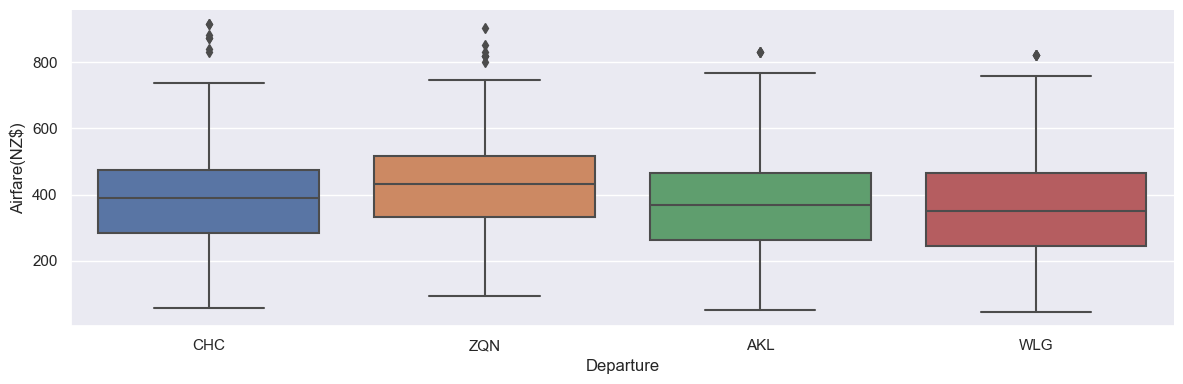

Destination


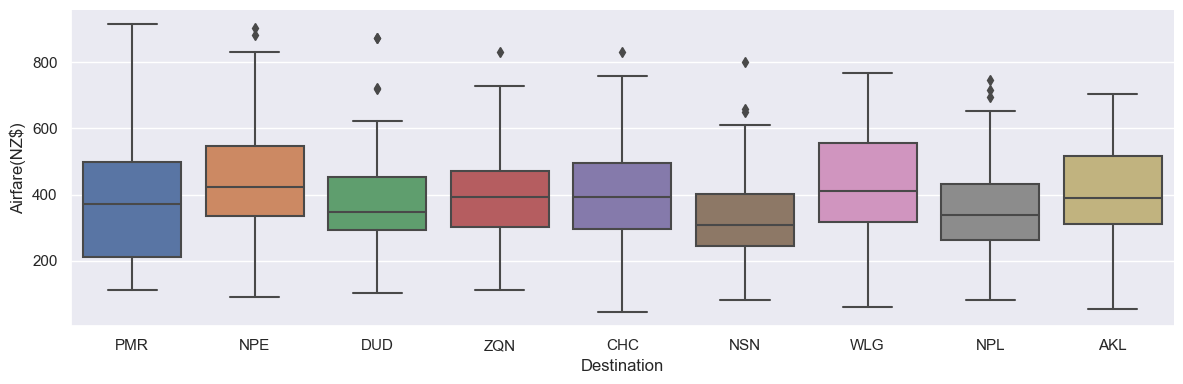

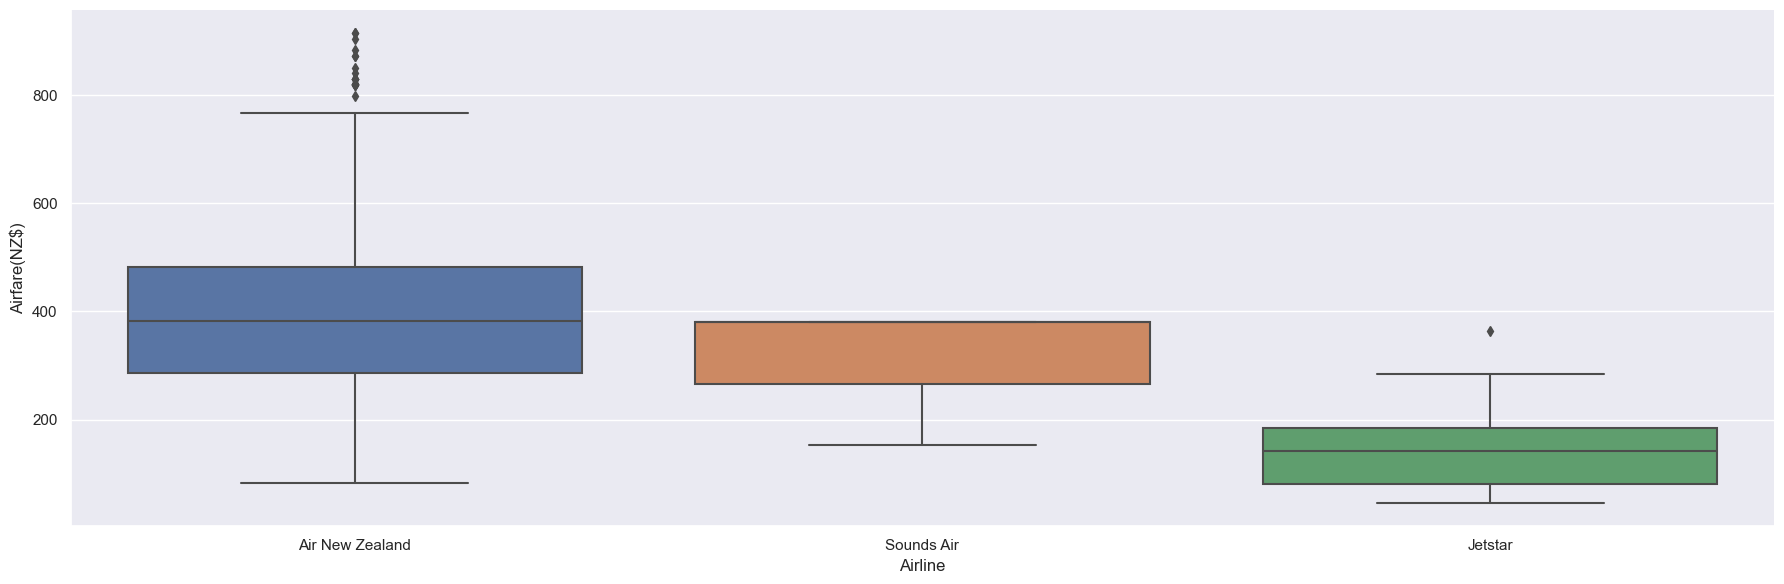

Airline
Shape of test data :  (1150, 24)


In [45]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

#Remove transit

#test_data=test_data.drop(columns=['Transit'])


# Travel Date

test_data["Travel_day"] = pd.to_datetime(test_data.Travel_date, format="%d/%m/%Y").dt.day
test_data["Travel_month"] = pd.to_datetime(test_data["Travel_date"], format = "%d/%m/%Y").dt.month
test_data.drop(["Travel_date"], axis = 1, inplace = True)

# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep. time"]).dt.hour

# Extracting Minutes
test_data["Dep_min"] = pd.to_datetime(test_data["Dep. time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
test_data.drop(["Dep. time"], axis = 1, inplace = True)

# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
test_data["Arrival_hour"] = pd.to_datetime(test_data["Arr. time"]).dt.hour

# Extracting Minutes
test_data["Arrival_min"] = pd.to_datetime(test_data["Arr. time"]).dt.minute

# Now we can drop Arrival_Time as it is of no use
test_data.drop(["Arr. time"], axis = 1, inplace = True)


# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


# Adding duration_hours and duration_mins list to test_data dataframe

test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins

test_data.drop(["Duration"], axis = 1, inplace = True)

test_data["Direct"].value_counts()

# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

test_data.replace({"(Direct)": 0, "(1 stop)": 1, "(2 stops)": 2, "(3 stops)": 3}, inplace = True)

test_data['Departure'].value_counts()

print("Departure")

# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Departure", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# As Departure is Nominal Categorical data we will perform OneHotEncoding

Departure = test_data["Departure"].str.get_dummies().drop('ZQN',axis=1).add_prefix('Dept_')

#Departure = pd.get_dummies(Departure)

Departure.head()
test_data['Destination'].value_counts()

# As Destination is Nominal Categorical data we will perform OneHotEncoding - drop WLG

Destination = test_data["Destination"].str.get_dummies().drop('WLG',axis=1).add_prefix('Arr_')

#Destination = pd.get_dummies(Destination)

print("Destination")

# Departure vs Price

sns.catplot(y = "Airfare(NZ$)", x = "Destination", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Airfare(NZ$)", x = "Airline", data = test_data.sort_values("Airfare(NZ$)", ascending = False), kind="box", height = 6, aspect = 3)
plt.show()

# As Airline is Nominal Categorical data we will perform OneHotEncoding - avoid Multicollinearity

Airline=test_data["Airline"].str.get_dummies().drop('Sounds Air',axis=1)
Airline = pd.get_dummies(Airline)

print("Airline")

#test_data["Transit"].value_counts()

test_data_v2 = pd.concat([test_data, Airline, Departure, Destination], axis = 1)

test_data_v2.drop(["Airline", "Departure", "Destination"], axis = 1, inplace = True)


print("Shape of test data : ", test_data_v2.shape)


In [46]:
test_data_v2.head()

,Direct,Transit,Airfare(NZ$),Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
52874,1,1h 25m in CHC,312,15,10,16,35,20,20,3,...,0,1,1,0,0,0,0,0,0,0
45546,1,13h 30m in AKL,502,11,10,17,0,9,45,16,...,1,0,0,0,0,0,0,0,0,1
94158,1,7h 50m in WLG,233,6,11,8,30,18,10,9,...,0,0,0,0,0,0,0,0,1,0
5771,0,0,223,21,9,15,45,16,50,1,...,0,0,0,1,0,0,0,0,0,0
8086,1,1h 45m in AKL,694,22,9,13,30,18,15,4,...,0,0,0,0,0,0,0,0,1,0


## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,


1. <span style="color: purple;">**heatmap**</span>
2. <span style="color: purple;">**feature_importance_**</span>
3. <span style="color: purple;">**SelectKBest**</span>

In [47]:
train_data_v2.shape

(4600, 24)

In [48]:
train_data_v2.columns

Index(['Travel_date', 'Direct', 'Airfare(NZ$)', 'Travel_day', 'Travel_month',
       'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air New Zealand', 'Jetstar', 'Dept_AKL', 'Dept_CHC',
       'Dept_WLG', 'Arr_AKL', 'Arr_CHC', 'Arr_DUD', 'Arr_NPE', 'Arr_NPL',
       'Arr_NSN', 'Arr_PMR', 'Arr_ZQN'],
      dtype='object')

In [49]:
X = train_data_v2.loc[:, ['Direct', 'Travel_day',
       'Travel_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins', 'Air New Zealand', 'Jetstar',
       'Dept_AKL', 'Dept_CHC', 'Dept_WLG', 'Arr_AKL', 'Arr_CHC', 'Arr_DUD',
       'Arr_NPE', 'Arr_NPL', 'Arr_NSN', 'Arr_PMR', 'Arr_ZQN']]
X.head()

,Direct,Travel_day,Travel_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air New Zealand,...,Dept_CHC,Dept_WLG,Arr_AKL,Arr_CHC,Arr_DUD,Arr_NPE,Arr_NPL,Arr_NSN,Arr_PMR,Arr_ZQN
117365,1,17,11,16,55,9,25,16,30,1,...,0,0,0,0,0,1,0,0,0,0
92539,1,5,11,5,45,8,55,3,10,1,...,1,0,0,0,0,0,1,0,0,0
41404,1,9,10,11,0,14,45,3,45,1,...,1,0,0,0,0,0,1,0,0,0
72268,1,26,10,7,0,11,20,4,20,1,...,0,0,0,0,0,0,1,0,0,0
124082,1,20,11,12,0,21,35,9,35,1,...,0,0,0,0,1,0,0,0,0,0


In [50]:
y = train_data_v2.iloc[:, 2]
y.head()

117365    590
92539     401
41404     401
72268     722
124082    502
Name: Airfare(NZ$), dtype: int64

C:\Users\alexchen\AppData\Local\Temp\ipykernel_952\1724404863.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data_v2.corr(), annot = True, cmap = "RdYlGn")


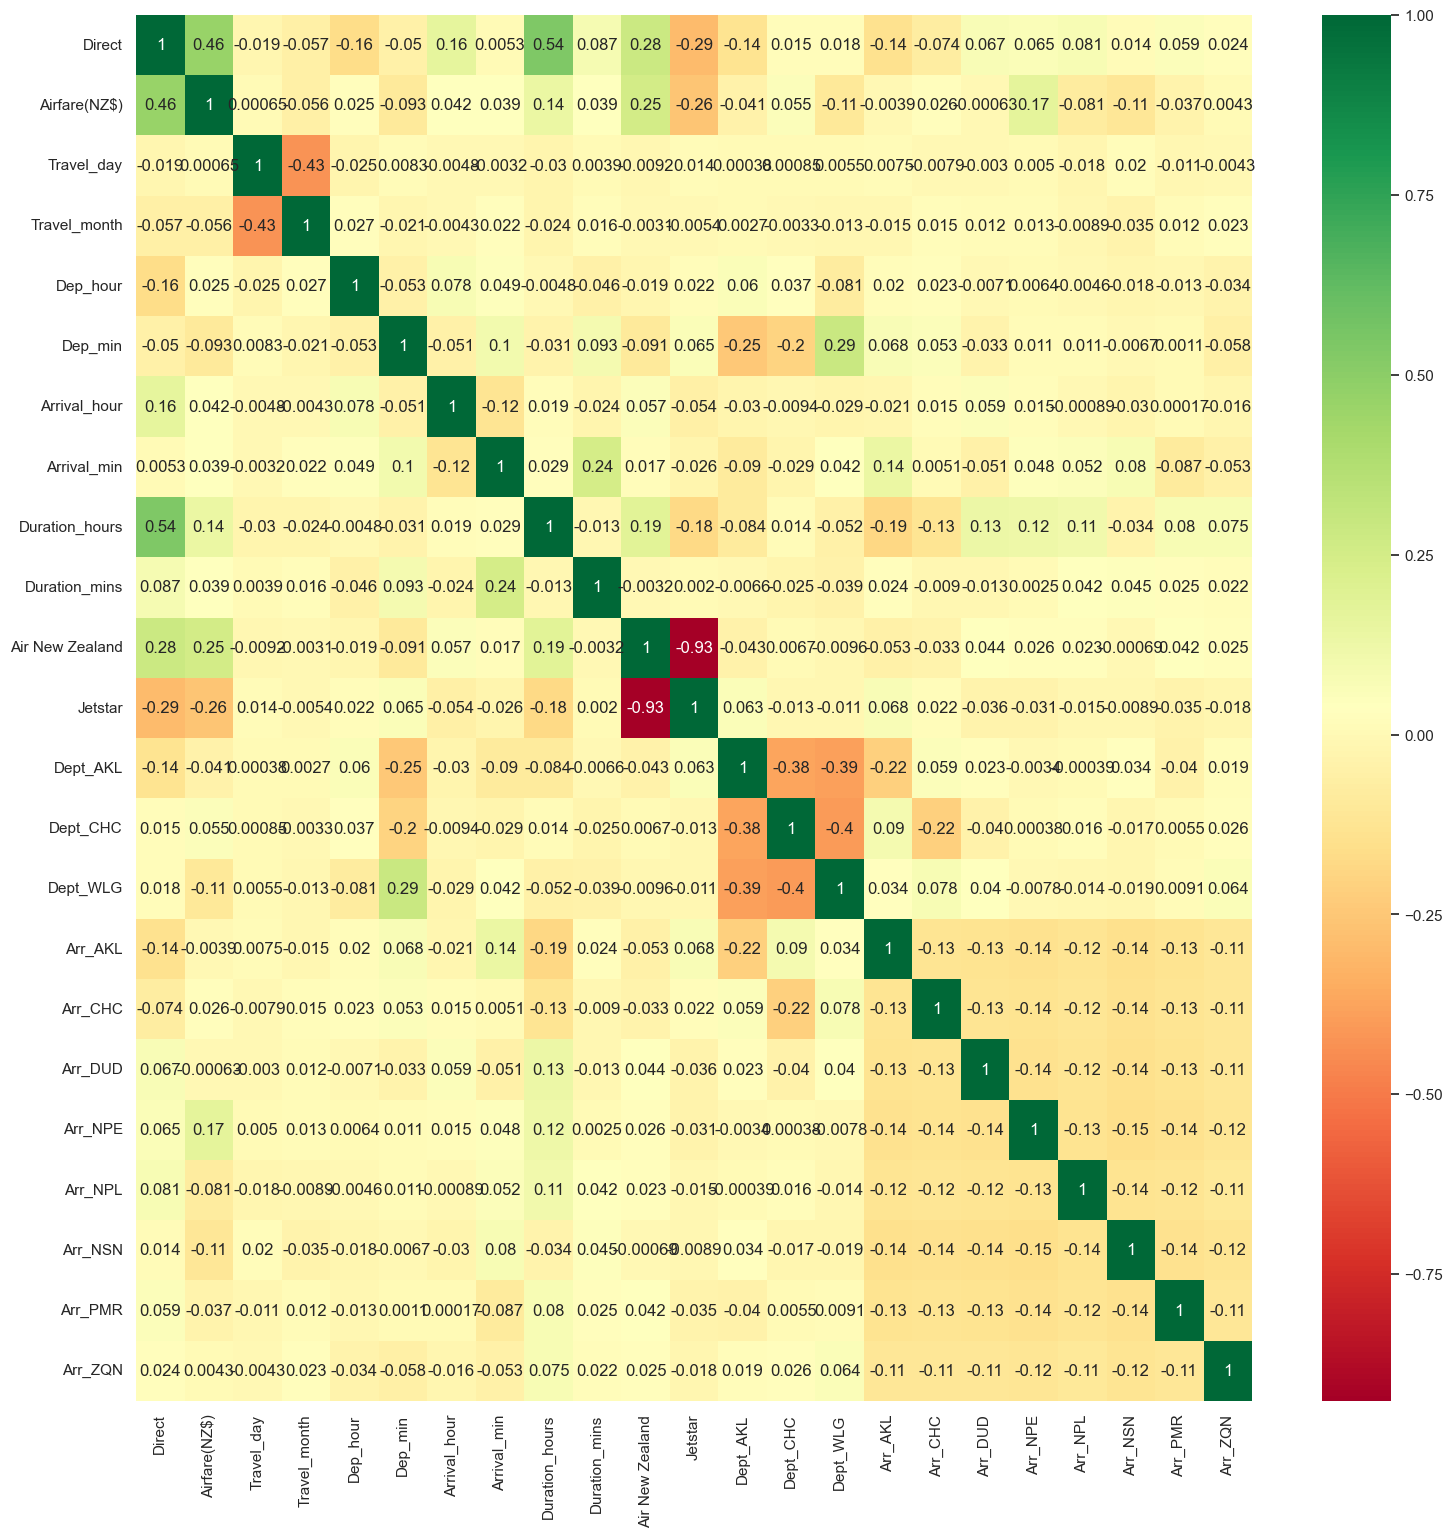

In [51]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data_v2.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [52]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [53]:
print(selection.feature_importances_)

[0.2143563  0.08296748 0.05259863 0.0542643  0.05536706 0.04920641
 0.05401529 0.10851852 0.04056149 0.0150748  0.00496153 0.02325105
 0.04390813 0.02748636 0.01616812 0.00592724 0.01256799 0.02686637
 0.02739171 0.02345008 0.05350957 0.00758157]


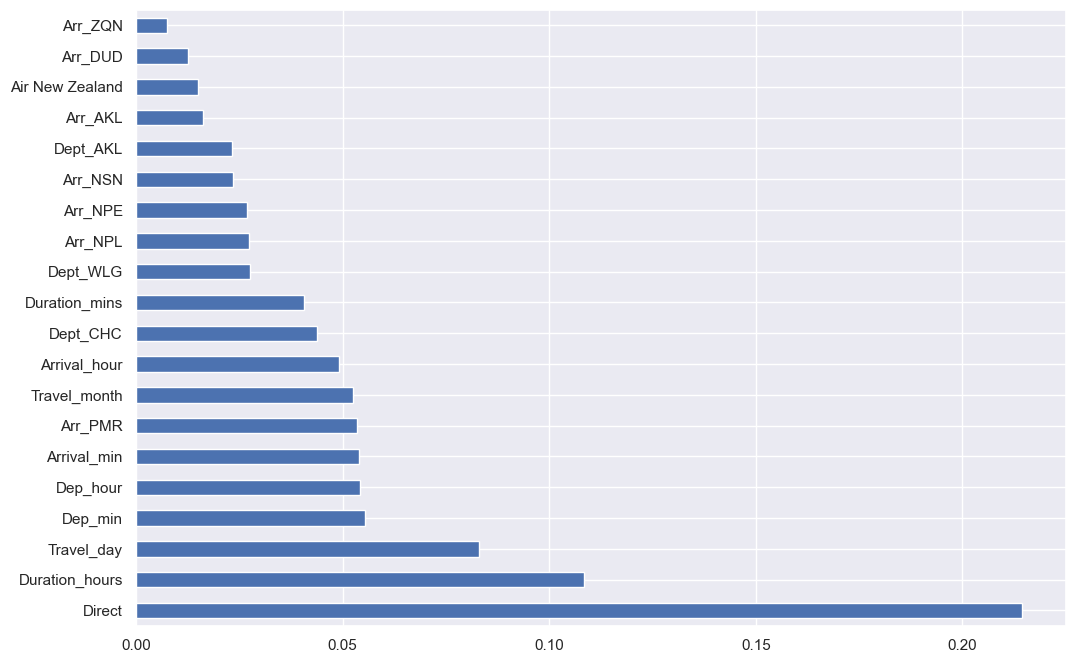

In [54]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


## Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
    * Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check **RSME** Score
7. Plot graph

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
y_pred = reg_rf.predict(X_test)

In [58]:
reg_rf.score(X_train, y_train)

0.9405600801636456

In [59]:
reg_rf.score(X_test, y_test)

0.6088492019358818

C:\Users\alexchen\AppData\Local\Temp\ipykernel_952\3453123835.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


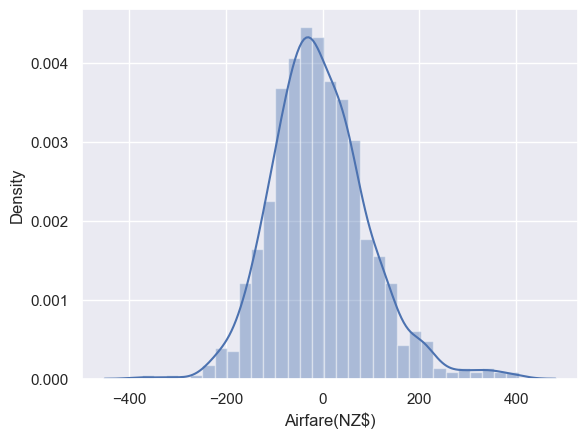

In [60]:
sns.distplot(y_test-y_pred)
plt.show()

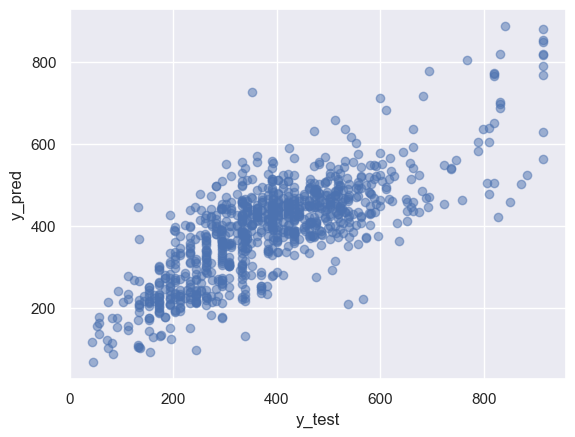

In [61]:

plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
from sklearn import metrics

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 77.21980434782608
MSE: 9993.860965217391
RMSE: 99.96930011367185


In [64]:
# RMSE/(max(DV)-min(DV))

92.8717/(max(y)-min(y))

0.10330556173526141

## Hyperparameter Tuning


* Choose following method for hyperparameter tuning
    1. **RandomizedSearchCV** --> Fast
    2. **GridSearchCV**
* Assign hyperparameters in form of dictionery
* Fit the model
* Check best paramters and best score

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [68]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [69]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.3s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.3s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.3s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.3s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   1.3s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   2.6s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.0s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   3.9s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.0s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.0s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   4.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   4.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   1.8s
[CV] END max_depth=5, max_feat

C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.7s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.9s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.7s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.8s


C:\Users\alexchen\miniconda3\envs\nz-airfare\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   4.8s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [71]:
prediction = rf_random.predict(X_test)

C:\Users\alexchen\AppData\Local\Temp\ipykernel_952\375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


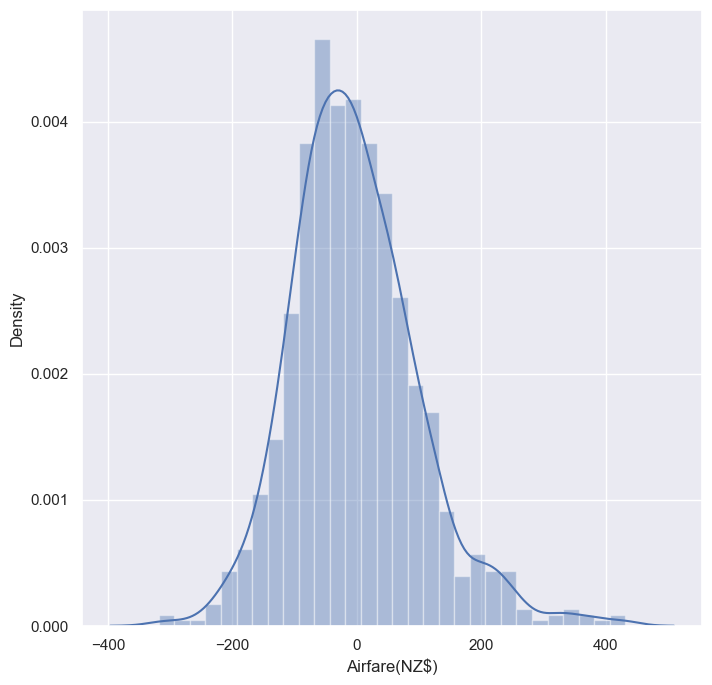

In [72]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

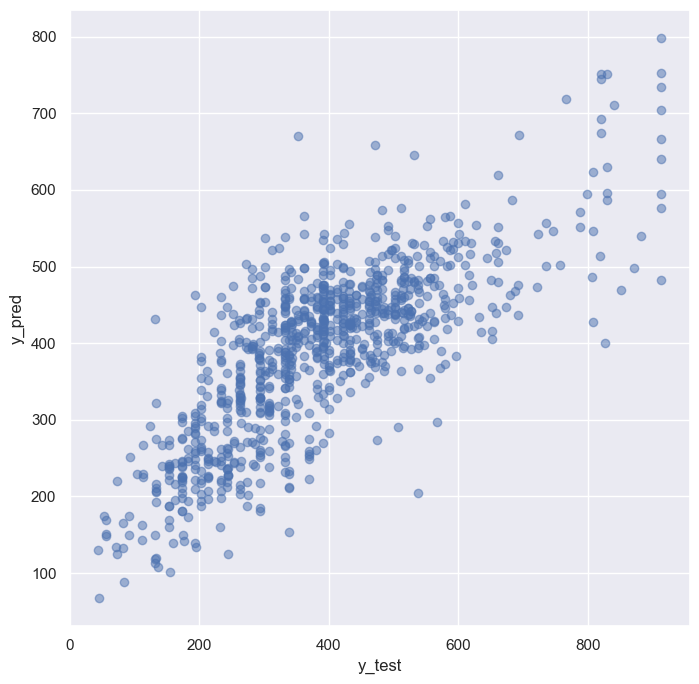

In [73]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 78.13837459524302
MSE: 10364.32583883021
RMSE: 101.80533305691903


## Save the model to reuse it again


In [75]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl','wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [76]:
model = open('flight_rf.pkl', 'rb')
forest = pickle.load(model)

In [77]:
y_prediction = forest.predict(X_test)

In [78]:
#R-square
metrics.r2_score(y_test, y_prediction)

0.6088492019358818